# K-Means Clustering 
- K-Means clustering is an unsupervised machine learning approach for dividing data into a predetermined number of clusters. The "K" represents the number of predetermined clusters that must be constructed.

- Each cluster is paired with a centroid in this centroid-based technique. The major goal is to shorten the distance between each data point and its cluster centroid.



## Mall Customer Data: Implementation of K-Means in Python
 dataset link:https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

In [1]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df=df.set_index('CustomerID')
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [4]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [6]:
df.isnull().sum()

Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Annual Income Distribution:

C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

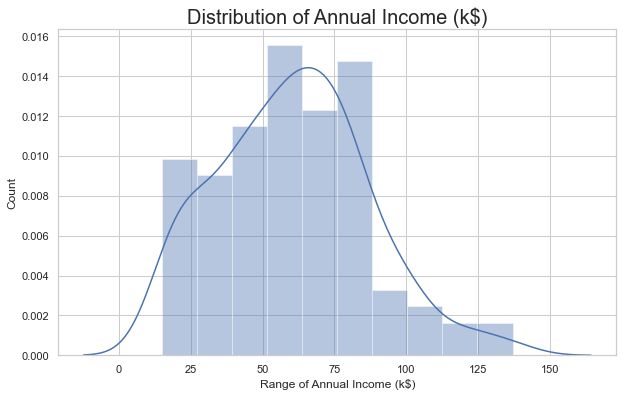

In [7]:
#Distribution of Annnual Income
plt.figure(figsize=(10,6))
sns.set(style='whitegrid')
sns.distplot(df['Annual Income (k$)'],kde=True)
plt.title('Distribution of Annual Income (k$)', fontsize = 20)
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')

**The majority of annual income is in the range of 50,000 to 85,000.**

### Age Distribution:

C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

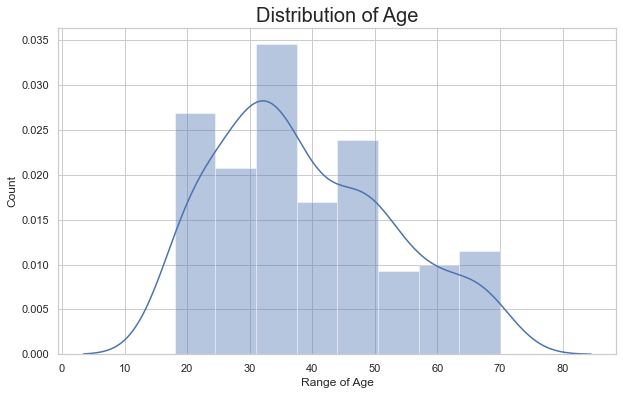

In [8]:
#Distribution of age
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(df['Age'])
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')

**A wide range of ages are represented among the customers.**



### Spending Score Distribution:

C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'counts')

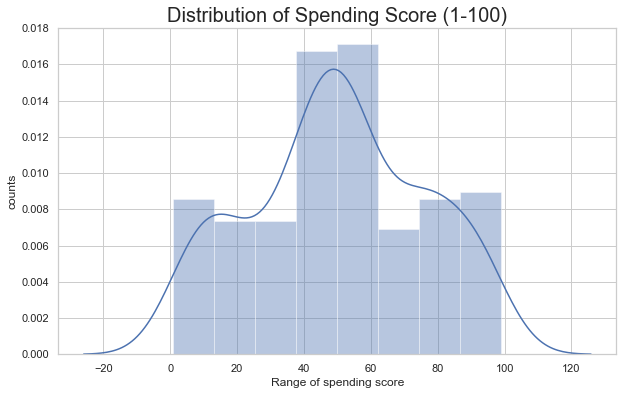

In [9]:
plt.figure(figsize=(10,6))
sns.set(style="whitegrid")
sns.distplot(df['Spending Score (1-100)'])
plt.title('Distribution of Spending Score (1-100)', fontsize=20)
plt.xlabel('Range of spending score')
plt.ylabel('counts')

**The maximum expenditure score is between 40 and 60.**

### Gender Analysis:

C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Genre', ylabel='count'>

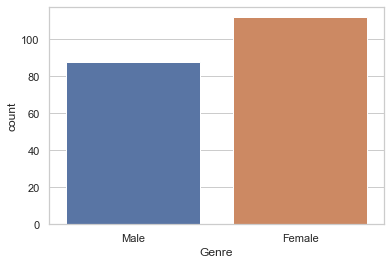

In [10]:
sns.countplot(df.Genre)

Text(0.5, 1.0, 'Spending Score (1-100) vs Annual Income (k$)')

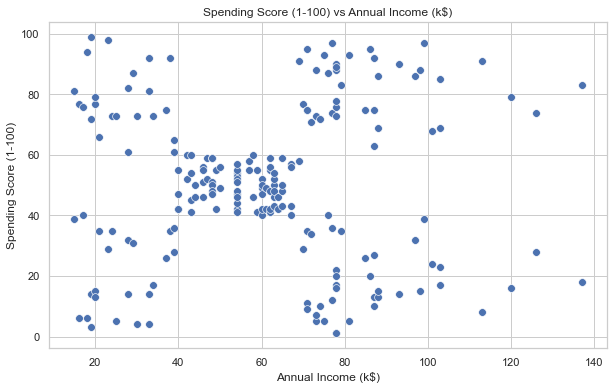

In [11]:
### Scatter plot of spending score and Annual Income (k$)
plt.figure(figsize=(10,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',data=df,s=60)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')

{'whiskers': [<matplotlib.lines.Line2D at 0x1fae87ef730>,
 'caps': [<matplotlib.lines.Line2D at 0x1fae87efdf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fae87ef3d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1fae87fc4f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fae87fc850>],
 'means': []}

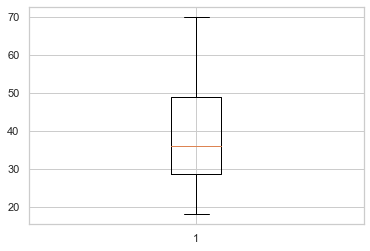

In [12]:
# Checking for outliers
plt.boxplot(df.Age)

{'whiskers': [<matplotlib.lines.Line2D at 0x1fae8849cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1fae8855400>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fae8849a30>],
 'medians': [<matplotlib.lines.Line2D at 0x1fae8855ac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fae8855e20>],
 'means': []}

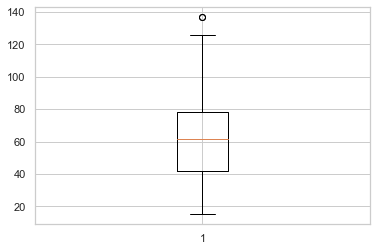

In [13]:
plt.boxplot(df['Annual Income (k$)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1fae88ac970>,
 'caps': [<matplotlib.lines.Line2D at 0x1fae88b9070>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fae88ac610>],
 'medians': [<matplotlib.lines.Line2D at 0x1fae88b9730>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fae88b9a90>],
 'means': []}

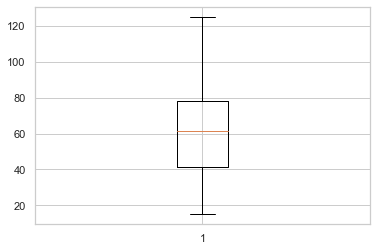

In [14]:
df['Annual Income (k$)']=np.where(df['Annual Income (k$)']>125,125,df['Annual Income (k$)'])

plt.boxplot(df['Annual Income (k$)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1fae8718340>,
 'caps': [<matplotlib.lines.Line2D at 0x1fae87608e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fae859b0a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1fae8686bb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fae8686c10>],
 'means': []}

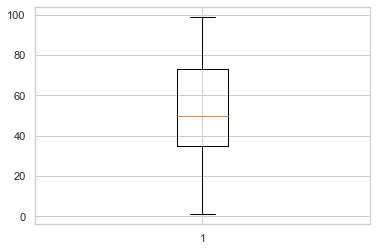

In [15]:
plt.boxplot(df['Spending Score (1-100)'])

In [16]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


### Clustering based on 2 features
To begin, we just consider two factors: annual income and spending score.

In [17]:
# We will use only 'Annual Income (k$)	Spending Score (1-100)' columns
X=df.iloc[:,2:]
X.head()

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40


## Finding value of K
For various choices of k, we calculate the Within Cluster Sum of Squared Errors (WCSS). Then we choose the k for which WCSS begins to decline. From the raw data, this value of K provides us the best number of clusters to build.
- Using Elbow method to find the optimal number of cluster

In [18]:
from sklearn.cluster import KMeans
WCSS=[] #Within Cluster Sum of Squares
for i in range(1,11):
    kmeans= KMeans(n_clusters=i,random_state=0)
    kmeans.fit(X)
    # inertia method returns wcss for that model
    WCSS.append(kmeans.inertia_) # data points are homogenious--> similar data point within the cluster

C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [19]:
WCSS

[266337.0199999999,
 178706.65050505052,
 104061.5923603569,
 71393.00833773396,
 42186.94870190196,
 35561.60026977853,
 29102.320843649108,
 23871.0343103969,
 20675.4856090982,
 18533.983606248847]

### Plot the graph for finding K-values

Text(0.5, 1.0, 'Elbow Method')

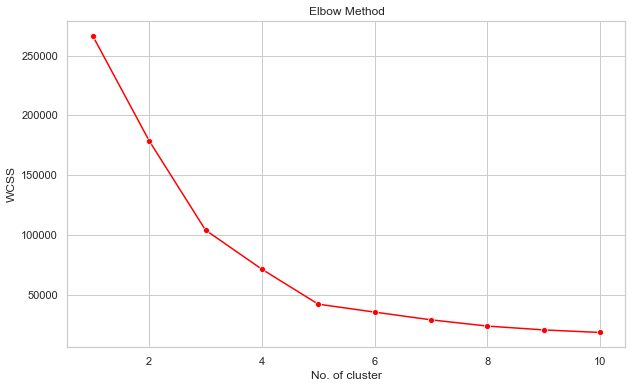

In [20]:
plt.figure(figsize=(10,6))
sns.lineplot(x=range(1,11),y=WCSS,marker='o',color='red')
plt.xlabel('No. of cluster')
plt.ylabel('WCSS')
plt.title('Elbow Method')

The x-axis is the number of clusters, and the number of clusters is taken at the elbow joint point. This is known as the elbow graph. Making clusters is very important at this stage since the WCSS value abruptly stops decreasing. We select 5 as the number of clusters because the drop beyond 5 is small in the graph.

#### Now fitting the model at k=3

In [21]:
kmeans= KMeans(n_clusters=5,random_state=0)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=0)

In [22]:
# Predict the k-mean
prediction= kmeans.predict(X)


In [23]:
#adding the labels to a column named label
df["label"] = prediction
#The new dataframe with the clustering done
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),label
CustomerID,,,,,
1,Male,19,15,39,0
2,Male,21,15,81,3
3,Female,20,16,6,0
4,Female,23,16,77,3
5,Female,31,17,40,0


In [24]:
df.tail()

,Genre,Age,Annual Income (k$),Spending Score (1-100),label
CustomerID,,,,,
196,Female,35,120,79,1
197,Female,45,125,28,2
198,Male,32,125,74,1
199,Male,32,125,18,2
200,Male,30,125,83,1


Text(0.5, 1.0, 'Spending Score (1-100) vs Annual Income (k$)')

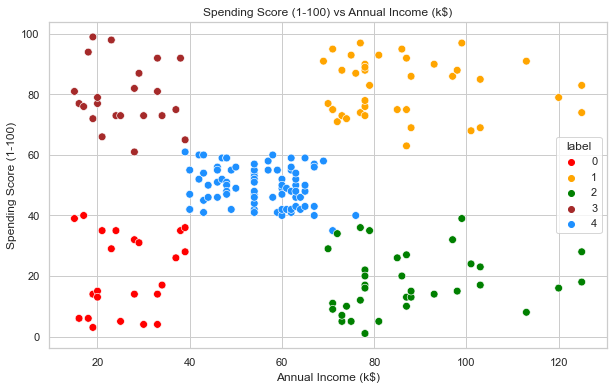

In [25]:
# scatter plot of cluster
plt.figure(figsize=(10,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',hue='label',data=df,
                palette=['red','orange','green','brown','dodgerblue'],
                s=60)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')

**From the data, we can observe that five separate clusters have formed. Customers with the lowest income and spending score are in the green cluster (cluster 2), while those with the highest income and spending score are in the red cluster (cluster 0).**